In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
from wordcloud import WordCloud
import nltk
from nltk.corpus import wordnet

In [109]:
train = pd.read_csv('./file/data/train.tsv',sep='\t',names = ["Sentence", "Class", "Delete"])
test = pd.read_csv('./file/data/test.tsv',sep='\t',names = ["Sentence", "Class", "Delete"])
val_data = pd.read_csv("./file/data/dev.tsv", sep="\t", header=None, names=["Sentence", "Class", "Delete"])

In [110]:
train = train.drop("Delete", axis=1)
test = test.drop("Delete", axis=1)
val_data = val_data.drop("Delete", axis=1)

In [111]:
train.head()

,Sentence,Class
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2
3,To make her feel threatened,14
4,Dirty Southern Wankers,3


In [112]:
test.head()

,Sentence,Class
0,I’m really sorry about your situation :( Altho...,25
1,It's wonderful because it's awful. At not with.,0
2,"Kings fan here, good luck to you guys! Will be...",13
3,"I didn't know that, thank you for teaching me ...",15
4,They got bored from haunting earth for thousan...,27


In [113]:
val_data.head()

,Sentence,Class
0,Is this in New Orleans?? I really feel like th...,27
1,"You know the answer man, you are programmed to...","4,27"
2,I've never been this sad in my life!,25
3,The economy is heavily controlled and subsidiz...,"4,27"
4,He could have easily taken a real camera from ...,20


In [114]:
print(train.shape)
print(test.shape)
print(val_data.shape)


(43410, 2)
(5427, 2)
(5426, 2)


In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  43410 non-null  object
 1   Class     43410 non-null  object
dtypes: object(2)
memory usage: 678.4+ KB


# Data Preprocessing

In [116]:
train["Class list"] = train["Class"].apply(lambda x: x.split(","))
train["Class len"] = train["Class list"].apply(lambda x: len(x))

test["Class list"] = test["Class"].apply(lambda x: x.split(","))
test["Class len"] = test["Class list"].apply(lambda x: len(x))

val_data["Class list"] = val_data["Class"].apply(lambda x: x.split(","))
val_data["Class len"] = val_data["Class list"].apply(lambda x: len(x))

In [117]:
train.head()

,Sentence,Class,Class list,Class len
0,My favourite food is anything I didn't have to...,27,[27],1
1,"Now if he does off himself, everyone will thin...",27,[27],1
2,WHY THE FUCK IS BAYLESS ISOING,2,[2],1
3,To make her feel threatened,14,[14],1
4,Dirty Southern Wankers,3,[3],1


In [118]:
val_data.head()

,Sentence,Class,Class list,Class len
0,Is this in New Orleans?? I really feel like th...,27,[27],1
1,"You know the answer man, you are programmed to...","4,27","[4, 27]",2
2,I've never been this sad in my life!,25,[25],1
3,The economy is heavily controlled and subsidiz...,"4,27","[4, 27]",2
4,He could have easily taken a real camera from ...,20,[20],1


In [119]:
with open("./file/data/ekman_mapping.json") as file:
    ekman_mapping = json.load(file)

In [120]:
ekman_mapping

{'anger': ['anger', 'annoyance', 'disapproval'],
 'disgust': ['disgust'],
 'fear': ['fear', 'nervousness'],
 'joy': ['joy',
  'amusement',
  'approval',
  'excitement',
  'gratitude',
  'love',
  'optimism',
  'relief',
  'pride',
  'admiration',
  'desire',
  'caring'],
 'sadness': ['sadness', 'disappointment', 'embarrassment', 'grief', 'remorse'],
 'surprise': ['surprise', 'realization', 'confusion', 'curiosity']}

In [121]:
emotion_file = open("./file/data/emotions.txt", "r")
emotion_list = emotion_file.read()
emotion_list = emotion_list.split("\n")
print(emotion_list)
print(len(emotion_list))

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
28


In [122]:
def idx2class(idxlist):
    arr = []
    for i in idxlist:
        arr.append(emotion_list[int(i)])
    return arr

In [123]:
train["Emotion"] = train["Class list"].apply(idx2class)
test["Emotion"] = test["Class list"].apply(idx2class)
val_data["Emotion"] = val_data["Class list"].apply(idx2class)

In [124]:
train.head()

,Sentence,Class,Class list,Class len,Emotion
0,My favourite food is anything I didn't have to...,27,[27],1,[neutral]
1,"Now if he does off himself, everyone will thin...",27,[27],1,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,2,[2],1,[anger]
3,To make her feel threatened,14,[14],1,[fear]
4,Dirty Southern Wankers,3,[3],1,[annoyance]


In [125]:
val_data.head()

,Sentence,Class,Class list,Class len,Emotion
0,Is this in New Orleans?? I really feel like th...,27,[27],1,[neutral]
1,"You know the answer man, you are programmed to...","4,27","[4, 27]",2,"[approval, neutral]"
2,I've never been this sad in my life!,25,[25],1,[sadness]
3,The economy is heavily controlled and subsidiz...,"4,27","[4, 27]",2,"[approval, neutral]"
4,He could have easily taken a real camera from ...,20,[20],1,[optimism]


In [126]:
def EmotionMapping(emotion_list):
    map_list = []
    
    for i in emotion_list:
        if i in ekman_mapping["anger"]:
            map_list.append("anger")
        if i in ekman_mapping["disgust"]:
            map_list.append("disgust")
        if i in ekman_mapping["fear"]:
            map_list.append("fear")
        if i in ekman_mapping["joy"]:
            map_list.append("joy")
        if i in ekman_mapping["sadness"]:
            map_list.append("sadness")
        if i in ekman_mapping["surprise"]:
            map_list.append("surprise")
        if i == "neutral":
            map_list.append("neutral")
            
    return map_list

In [127]:
train["Mapped_emotion"] = train["Emotion"].apply(EmotionMapping)
test["Mapped_emotion"] = test["Emotion"].apply(EmotionMapping)
val_data["Mapped_emotion"] = val_data["Emotion"].apply(EmotionMapping)

In [128]:
train.head()

,Sentence,Class,Class list,Class len,Emotion,Mapped_emotion
0,My favourite food is anything I didn't have to...,27,[27],1,[neutral],[neutral]
1,"Now if he does off himself, everyone will thin...",27,[27],1,[neutral],[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,2,[2],1,[anger],[anger]
3,To make her feel threatened,14,[14],1,[fear],[fear]
4,Dirty Southern Wankers,3,[3],1,[annoyance],[anger]


In [129]:
val_data.head()

,Sentence,Class,Class list,Class len,Emotion,Mapped_emotion
0,Is this in New Orleans?? I really feel like th...,27,[27],1,[neutral],[neutral]
1,"You know the answer man, you are programmed to...","4,27","[4, 27]",2,"[approval, neutral]","[joy, neutral]"
2,I've never been this sad in my life!,25,[25],1,[sadness],[sadness]
3,The economy is heavily controlled and subsidiz...,"4,27","[4, 27]",2,"[approval, neutral]","[joy, neutral]"
4,He could have easily taken a real camera from ...,20,[20],1,[optimism],[joy]


In [130]:
train_data_1= train["Mapped_emotion"].str.split(",", expand=True)
test_data_1= test["Mapped_emotion"].str.split(",", expand=True)
val_data_1= val_data["Mapped_emotion"].str.split(",", expand=True)

In [131]:
val_data.head()

,Sentence,Class,Class list,Class len,Emotion,Mapped_emotion
0,Is this in New Orleans?? I really feel like th...,27,[27],1,[neutral],[neutral]
1,"You know the answer man, you are programmed to...","4,27","[4, 27]",2,"[approval, neutral]","[joy, neutral]"
2,I've never been this sad in my life!,25,[25],1,[sadness],[sadness]
3,The economy is heavily controlled and subsidiz...,"4,27","[4, 27]",2,"[approval, neutral]","[joy, neutral]"
4,He could have easily taken a real camera from ...,20,[20],1,[optimism],[joy]


In [132]:
train_data_1 = pd.DataFrame(train["Mapped_emotion"].tolist())
test_data_1 = pd.DataFrame(test["Mapped_emotion"].tolist())
val_data_1 = pd.DataFrame(val_data["Mapped_emotion"].tolist())


train_data_1.reset_index(drop=True, inplace=True)
test_data_1.reset_index(drop=True, inplace=True)
val_data_1.reset_index(drop=True, inplace=True)

In [133]:
val_data_1.head()

,0,1,2,3
0,neutral,None,None,None
1,joy,neutral,None,None
2,sadness,None,None,None
3,joy,neutral,None,None
4,joy,None,None,None


In [134]:
train_data_1.drop(train_data_1.columns[1:5], axis=1, inplace=True)
test_data_1.drop(test_data_1.columns[1:5], axis=1, inplace=True)
val_data_1.drop(val_data_1.columns[1:5], axis=1, inplace=True)

In [135]:
val_data_1.head()

,0
0,neutral
1,joy
2,sadness
3,joy
4,joy


In [136]:
train_data = pd.concat([train, train_data_1], axis=1)
test_data = pd.concat([test, test_data_1], axis=1)
val_data = pd.concat([val_data, val_data_1], axis=1)

In [137]:
val_data.head()

,Sentence,Class,Class list,Class len,Emotion,Mapped_emotion,0
0,Is this in New Orleans?? I really feel like th...,27,[27],1,[neutral],[neutral],neutral
1,"You know the answer man, you are programmed to...","4,27","[4, 27]",2,"[approval, neutral]","[joy, neutral]",joy
2,I've never been this sad in my life!,25,[25],1,[sadness],[sadness],sadness
3,The economy is heavily controlled and subsidiz...,"4,27","[4, 27]",2,"[approval, neutral]","[joy, neutral]",joy
4,He could have easily taken a real camera from ...,20,[20],1,[optimism],[joy],joy


In [138]:
train_data = train_data.drop(["Class", "Class list", "Class len", "Emotion","Mapped_emotion"], axis=1)
test_data = test_data.drop(["Class", "Class list", "Class len", "Emotion","Mapped_emotion"], axis=1)
val_data = val_data.drop(["Class", "Class list", "Class len", "Emotion","Mapped_emotion"], axis=1)

In [141]:
val_data.head()

,Sentence,Emotion
0,Is this in New Orleans?? I really feel like th...,neutral
1,"You know the answer man, you are programmed to...",joy
2,I've never been this sad in my life!,sadness
3,The economy is heavily controlled and subsidiz...,joy
4,He could have easily taken a real camera from ...,joy


In [140]:
train_data.rename(columns={0: "Emotion"}, inplace=True)
test_data.rename(columns={0: "Emotion"}, inplace=True)
val_data.rename(columns={0: "Emotion"}, inplace=True)

In [142]:
train_data.Emotion.value_counts()

Emotion
joy         16948
neutral     12823
anger        5336
surprise     4489
sadness      2619
fear          615
disgust       580
Name: count, dtype: int64

# WORD CLOUD

In [143]:
emotion_list = train_data["Emotion"].unique()
emotion_list

array(['neutral', 'anger', 'fear', 'surprise', 'joy', 'sadness',
       'disgust'], dtype=object)

In [144]:
def word_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.suptitle(df + " Word Cloud", size=15)
    plt.imshow(wordcloud)
    plt.axis("off")

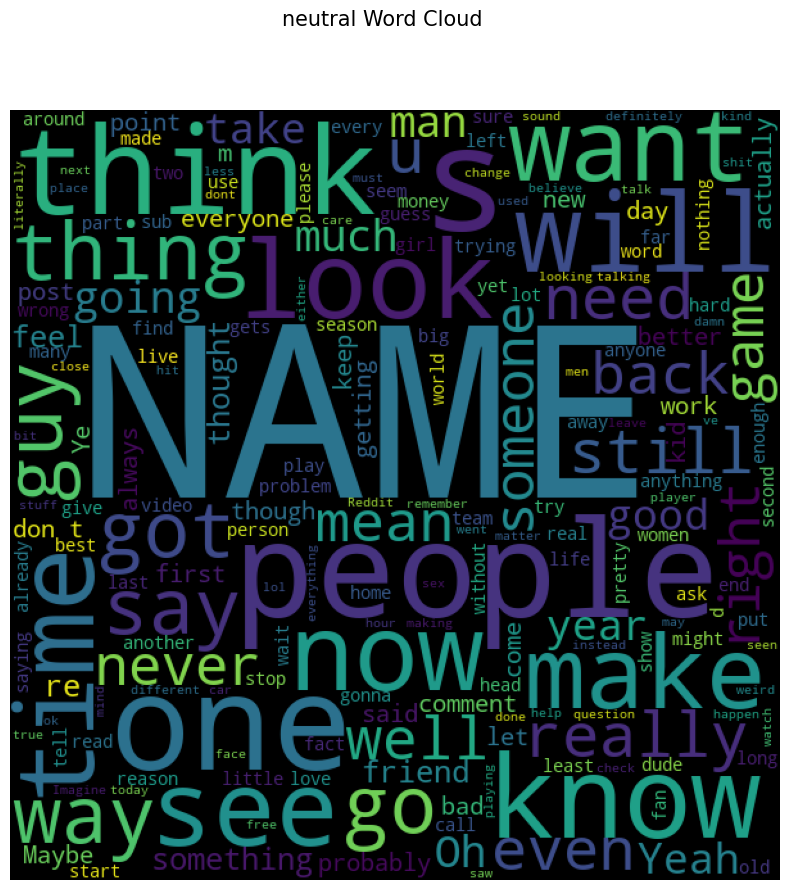

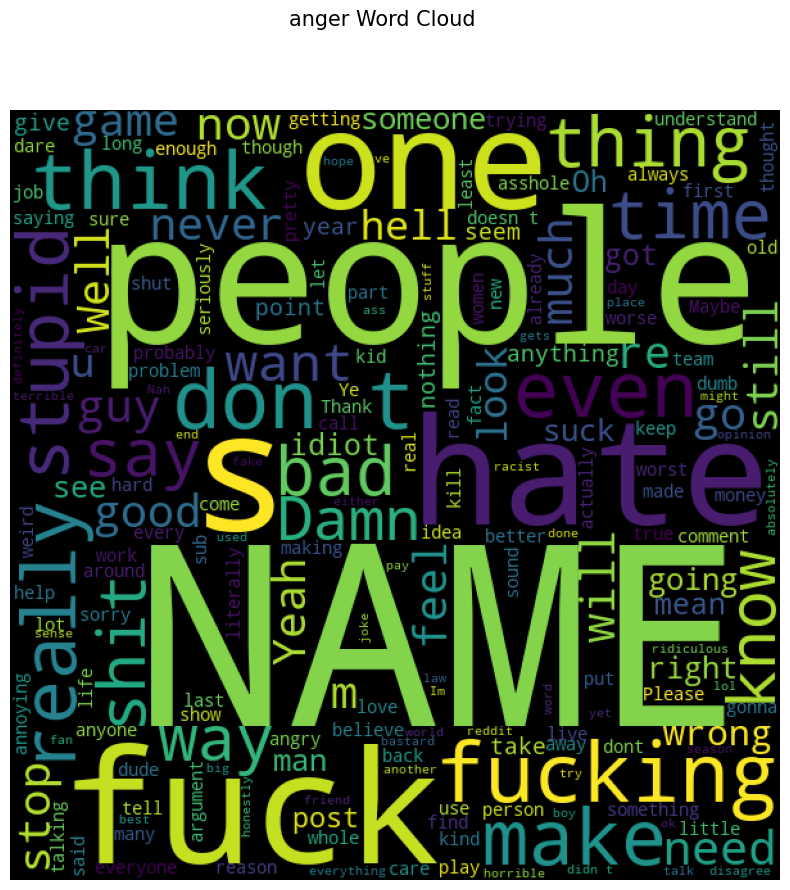

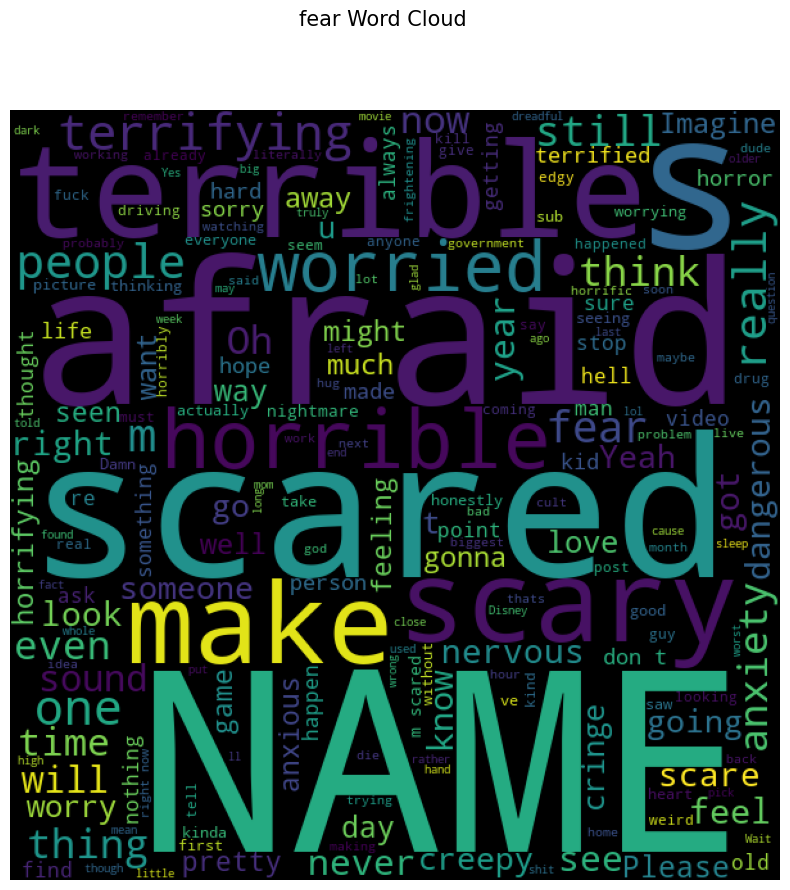

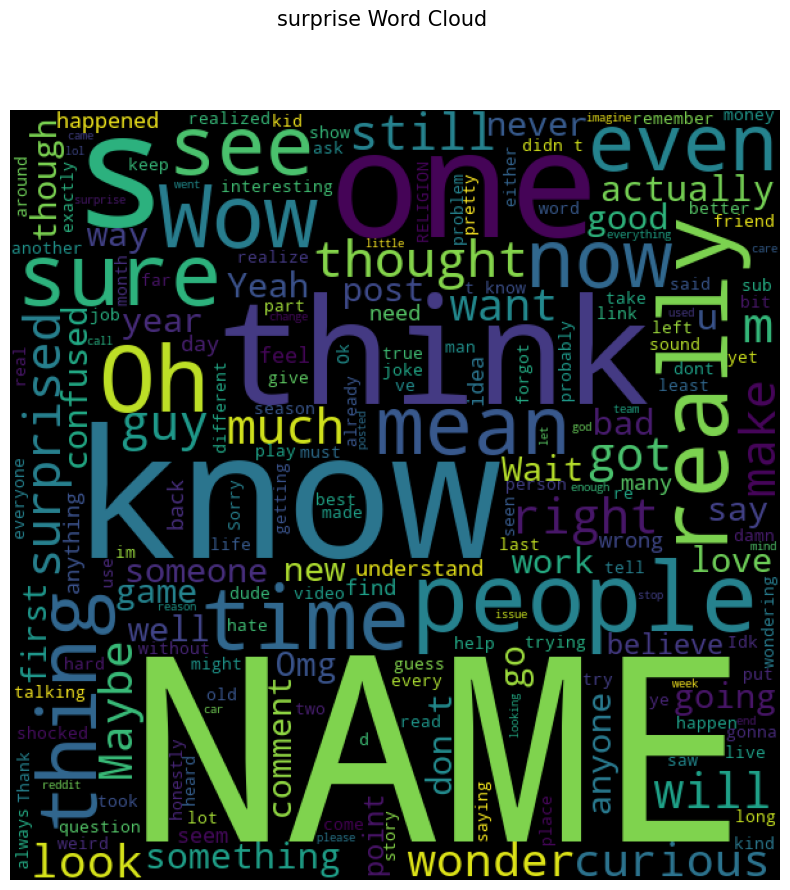

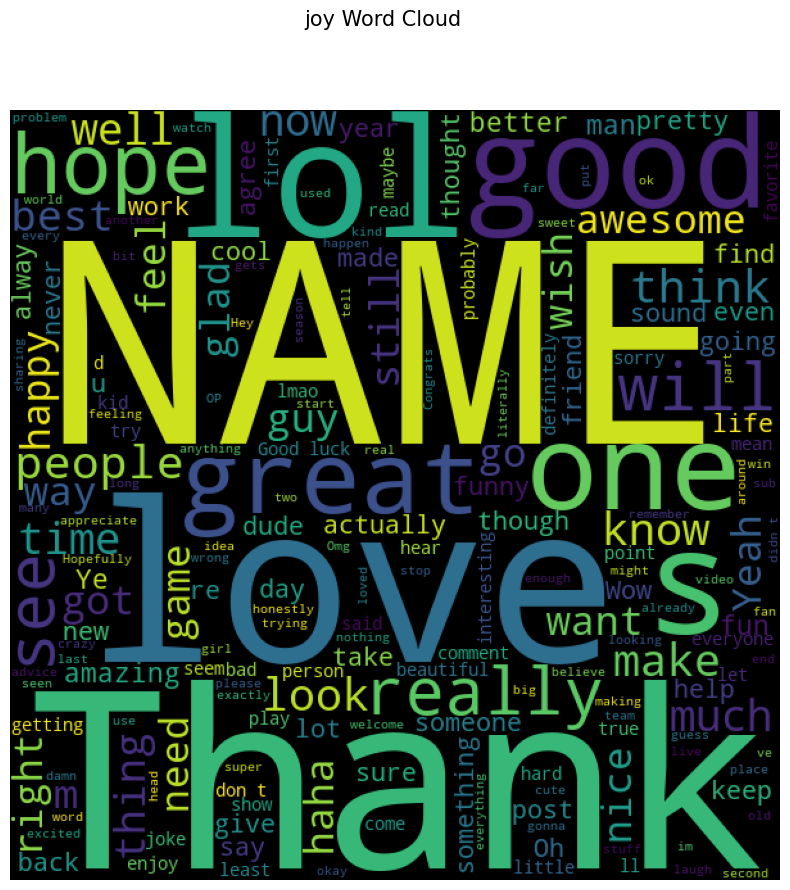

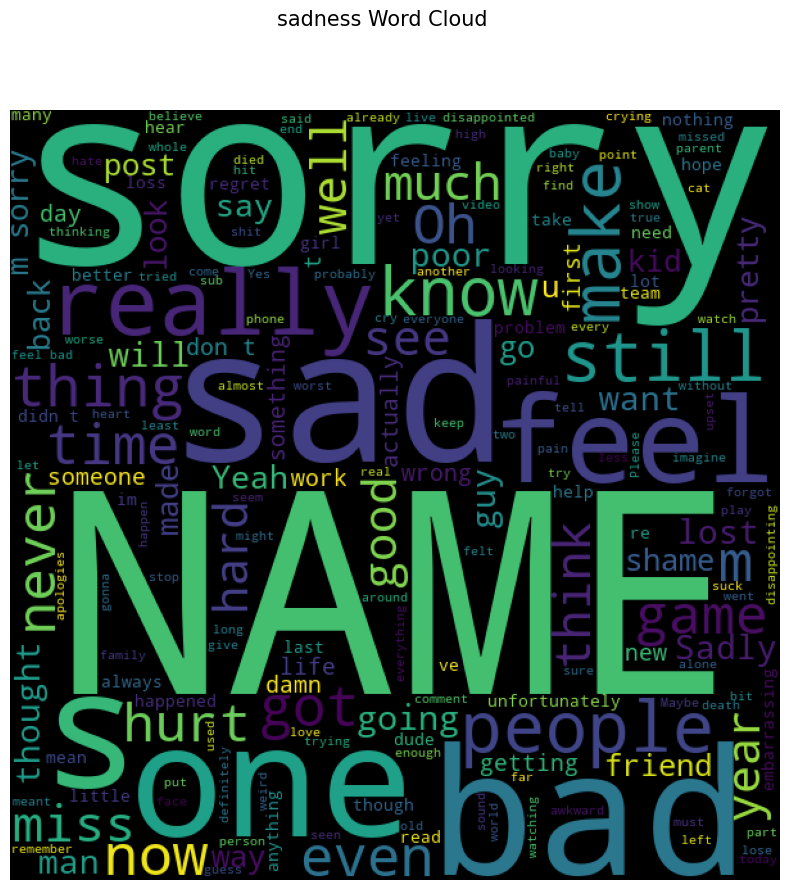

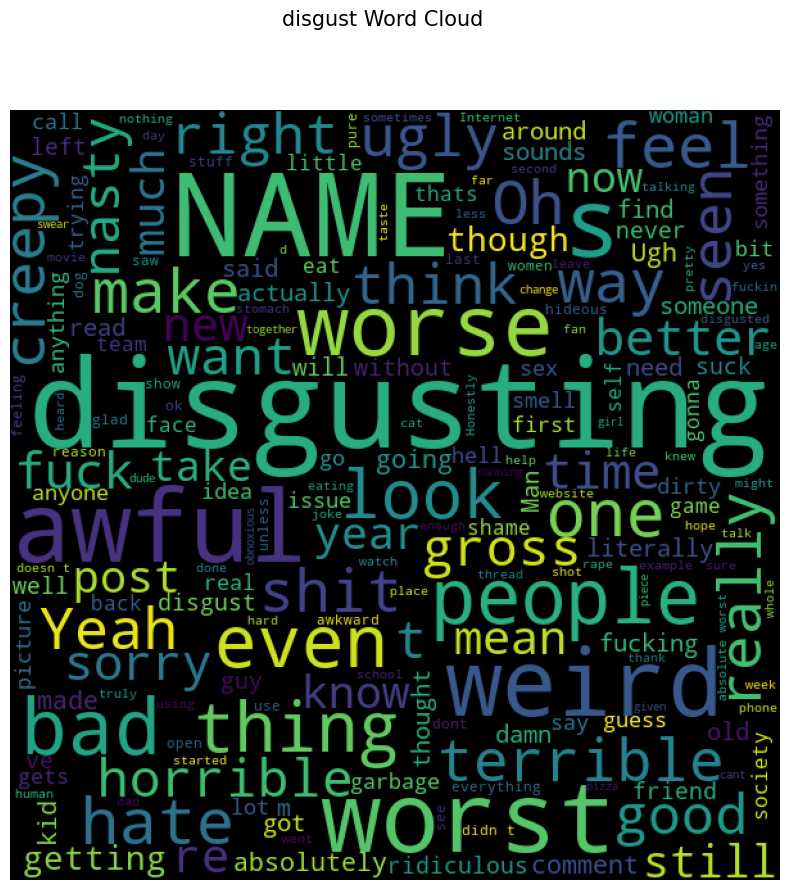

In [149]:
for emotion in emotion_list:
    text = " ".join([sentence for sentence in train_data.loc[train_data["Emotion"] == emotion, "Sentence"]])
    wordcloud = WordCloud(width=600, height=600).generate(text)
    word_cloud(wordcloud, emotion)

In [150]:
train_data["Emotion"] = train_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})
test_data["Emotion"] = test_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})
val_data["Emotion"] = val_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})

C:\Users\ssttg\AppData\Local\Temp\ipykernel_14104\3481180256.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["Emotion"] = train_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})
C:\Users\ssttg\AppData\Local\Temp\ipykernel_14104\3481180256.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["Emotion"] = test_data.Emotion.replace({"anger":0, "disgust":1, "fear":2, "joy":3, "sadness":4, "surprise":5, "neutral":6})
C:\Users\ssttg\AppData\Local\Temp\ipyker

In [151]:
train_data.head()

,Sentence,Emotion
0,My favourite food is anything I didn't have to...,6
1,"Now if he does off himself, everyone will thin...",6
2,WHY THE FUCK IS BAYLESS ISOING,0
3,To make her feel threatened,2
4,Dirty Southern Wankers,0


In [157]:
# Check for null values
print("Train data:\n", train_data.isnull().sum())
print("Test data: \n", test_data.isnull().sum())
print("Validation data: \n", val_data.isnull().sum())

# Check duplicated values
print("\n \n Train data:", train_data.duplicated().sum())
print("Test data:", test_data.duplicated().sum())
print("Validation data:", val_data.duplicated().sum())

Train data:
 Sentence    0
Emotion     0
dtype: int64
Test data: 
 Sentence    0
Emotion     0
dtype: int64
Validation data: 
 Sentence    0
Emotion     0
dtype: int64

 
 Train data: 152
Test data: 6
Validation data: 3


In [158]:
#Removing Duplicated values
index = train_data[train_data.duplicated() == True].index
train_data.drop(index, axis=0, inplace=True)
train_data.reset_index(inplace=True, drop=True)

index = test_data[test_data.duplicated() == True].index
test_data.drop(index, axis=0, inplace=True)
test_data.reset_index(inplace=True, drop=True)

index = val_data[val_data.duplicated() == True].index
val_data.drop(index, axis=0, inplace=True)
val_data.reset_index(inplace=True, drop=True)

In [159]:
# Check for null values
print("Train data:\n", train_data.isnull().sum())
print("Test data: \n", test_data.isnull().sum())
print("Validation data: \n", val_data.isnull().sum())

# Check duplicated values
print("\n \n Train data:", train_data.duplicated().sum())
print("Test data:", test_data.duplicated().sum())
print("Validation data:", val_data.duplicated().sum())

Train data:
 Sentence    0
Emotion     0
dtype: int64
Test data: 
 Sentence    0
Emotion     0
dtype: int64
Validation data: 
 Sentence    0
Emotion     0
dtype: int64

 
 Train data: 0
Test data: 0
Validation data: 0


In [160]:
train_data[train_data["Sentence"].duplicated() == True]

,Sentence,Emotion
6610,My man!,3
7925,What do you mean?,5
8344,Weird flex but okay,3
8978,[NAME],6
9375,Grow up.,0
9481,Weird flex but ok,1
14012,You're welcome,6
14104,This is horrible,2
15809,Lol no.,3
20768,Oh boy yeah,3


In [165]:
test_data[test_data["Sentence"].duplicated() == True]

,Sentence,Emotion


In [164]:
val_data[val_data["Sentence"].duplicated() == True]

,Sentence,Emotion


In [167]:
index = train_data[train_data["Sentence"].duplicated() == True].index
train_data.drop(index, axis=0, inplace = True)
train_data.reset_index(inplace=True, drop=True)

In [168]:
train_data.head()

,Sentence,Emotion
0,My favourite food is anything I didn't have to...,6
1,"Now if he does off himself, everyone will thin...",6
2,WHY THE FUCK IS BAYLESS ISOING,0
3,To make her feel threatened,2
4,Dirty Southern Wankers,0
